### Problem Statement:
####  create a model that predicts which passengers survived the Titanic shipwreck.

### Library:

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

### Data Gathering:

In [2]:
train_data = pd.read_csv(r'D:\Datascience\Kaggle\Titanic\train.csv')
test_data = pd.read_csv(r'D:\Datascience\Kaggle\Titanic\test.csv')

In [3]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
train_data.shape

(891, 12)

In [6]:
test_data.shape

(418, 11)

### Feature Engineering:

In [7]:
train_data.columns.difference(test_data.columns)

Index(['Survived'], dtype='object')

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_data['Survived'].unique()

array([0, 1], dtype=int64)

In [10]:
train_data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [11]:
train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [12]:
train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [13]:
train_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [14]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
train_data.duplicated().sum()

0

In [17]:
# univariate analysis

<AxesSubplot:>

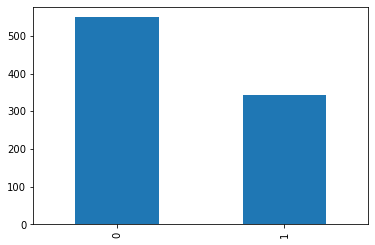

In [18]:
train_data['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

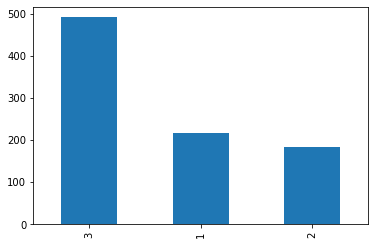

In [19]:
train_data['Pclass'].value_counts().plot(kind='bar')

<AxesSubplot:>

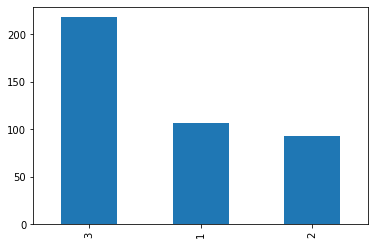

In [20]:
test_data['Pclass'].value_counts().plot(kind='bar')

<AxesSubplot:>

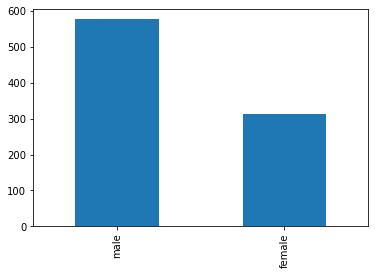

In [21]:
train_data['Sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

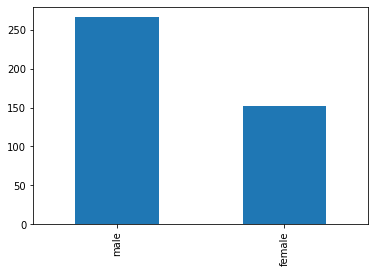

In [22]:
test_data['Sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

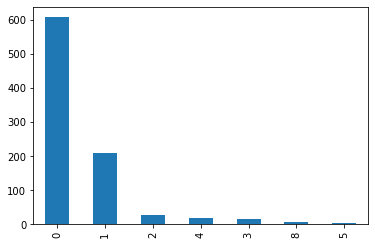

In [23]:
train_data['SibSp'].value_counts().plot(kind='bar')

<AxesSubplot:>

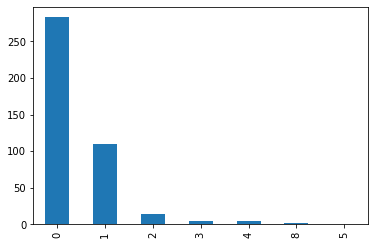

In [24]:
test_data['SibSp'].value_counts().plot(kind='bar')

<AxesSubplot:>

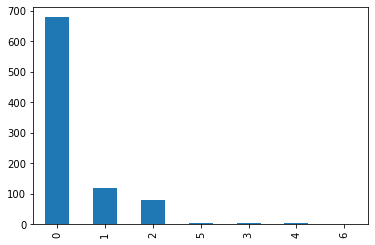

In [25]:
train_data['Parch'].value_counts().plot(kind='bar')

<AxesSubplot:>

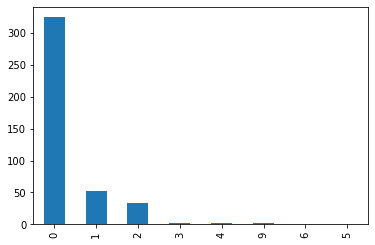

In [26]:
test_data['Parch'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

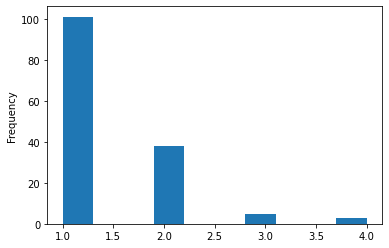

In [27]:
train_data['Cabin'].value_counts().plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

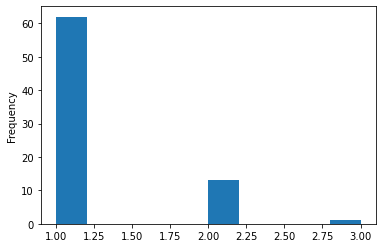

In [28]:
test_data['Cabin'].value_counts().plot(kind='hist')

In [29]:
#bivariate analysis

<AxesSubplot:xlabel='Survived'>

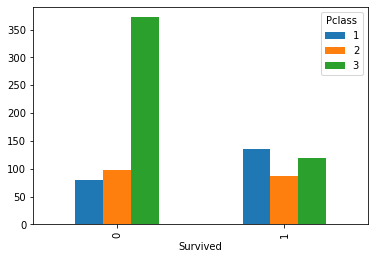

In [30]:
pd.crosstab(train_data['Survived'],train_data['Pclass']).plot(kind='bar')

<AxesSubplot:xlabel='Survived'>

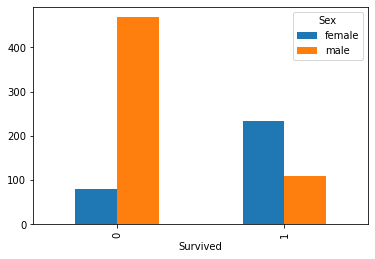

In [31]:
pd.crosstab(train_data['Survived'],train_data['Sex']).plot(kind='bar')

In [32]:
train_data.drop(columns=['PassengerId']).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [33]:
all_data = pd.concat([train_data,test_data])

In [34]:
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [35]:
#all_data['Cabin']=all_data['Cabin'].fillna(method='ffill',axis=0)
#all_data['Cabin'] = all_data.groupby(['Pclass','Sex'])['Cabin'].transform(lambda v: v.ffill())
all_data['Cabin']=all_data['Cabin'].fillna('C89')

In [36]:
all_data['Cabin'].describe()

count     1309
unique     186
top        C89
freq      1016
Name: Cabin, dtype: object

In [37]:
all_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1046.0,NaN,NaN,NaN,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
Ticket,1309,929,CA. 2343,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292


In [38]:
all_data['Age']=all_data['Age'].fillna('0')

In [39]:
all_data['Embarked']=all_data['Embarked'].fillna('S')

In [40]:
all_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C89,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C89,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C89,S
5,6,0.0,3,"Moran, Mr. James",male,0,0,0,330877,8.4583,C89,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,C89,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,C89,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C89,C


In [41]:
all_data['Age']=all_data['Age'].astype(int)

In [42]:
all_data = pd.get_dummies(all_data,columns=['Sex','Embarked'])

In [43]:
label_Encoder = LabelEncoder()
all_data['Cabin'] = label_Encoder.fit_transform(all_data['Cabin'])

In [44]:
all_data['Cabin'].unique()

array([109, 106,  70, 163, 184,  62, 143,  17,  80,  54, 129,  32,  92,
        30, 105, 181, 179, 154,  16, 118, 126,  66,  48, 148, 177, 139,
        58, 180,  78, 155,  25,  18,  89, 183,  13,  38,  56,  12, 132,
       120, 113, 102, 131, 108,  53, 170,  59,  72, 116,  69, 145,   5,
        42, 117,  79,  65,  98, 157,  94,  47, 100, 156,  84,  24,  71,
       111, 160, 185,  74, 133,  33, 165, 104,  60, 147, 161,  14,  63,
        67, 112, 158, 124, 149, 169,   2,  35,  82, 123,  55, 153, 138,
        52, 114,  36,  37,  27, 107, 101,   3,  61,  99,   0, 171,  39,
         6, 122, 142, 146,   8,  44,  10, 140, 167,  73,  51,  45, 141,
        43,  26, 178,  97, 152, 110,  86, 173,  21, 137,  87, 128, 150,
       119, 172, 182,  31, 144,  57, 121,  15,  22,  50, 164,  88, 127,
       151,   9,  90,  40,  77,  41,  34,   7, 130,  19,  83,  49,  93,
       136,  75,  76,  95,  68, 174,  11,  96,  81,  91, 115, 125,  20,
       162, 166,   1,  23, 103, 175,  29, 176,   4, 168, 159,  4

In [45]:
pp_train = all_data[all_data['Survived'].notna()]
pp_test = all_data[all_data['Survived'].isna()]

### Feature Selection:

In [46]:
X = pp_train.drop(columns=['PassengerId','Name','Ticket','Fare','Survived'])
y = pp_train['Survived']

In [47]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((712, 10), (179, 10), (712,), (179,))

In [48]:
train_X.shape[0], test_X.shape[0], train_X.shape[0]+ test_X.shape[0], pp_train.shape[0]

(712, 179, 891, 891)

In [49]:
train_y.isna().sum()

0

### Model Selection:

In [50]:
model = LogisticRegression(max_iter=500)
model.fit(train_X,train_y)

LogisticRegression(max_iter=500)

In [51]:
model.coef_, model.intercept_

(array([[-0.96776056, -0.00987581, -0.2419383 , -0.04854665,  0.00565844,
          1.36931147, -1.30145366,  0.3296853 , -0.05605795, -0.20576954]]),
 array([1.84358026]))

In [52]:
y_pred = model.predict(train_X)
print('Train accuracy')
print('accuracy score',accuracy_score(train_y,y_pred))
print('f1 score',f1_score(train_y,y_pred))
print('confusion matrix\n',confusion_matrix(train_y,y_pred))

Train accuracy
accuracy score 0.8033707865168539
f1 score 0.7233201581027668
confusion matrix
 [[389  55]
 [ 85 183]]


In [53]:
y_test_pred = model.predict(test_X)
print('Test accuracy')
print('accuracy score',accuracy_score(test_y,y_test_pred))
print('f1 score',f1_score(test_y,y_test_pred))
print('confusion matrix\n',confusion_matrix(test_y,y_test_pred))

Test accuracy
accuracy score 0.7877094972067039
f1 score 0.7397260273972601
confusion matrix
 [[87 18]
 [20 54]]


In [59]:
pptest_X = pp_test.drop(columns=['PassengerId','Name','Ticket','Fare','Survived'])
y_unpred = model.predict(pptest_X)

In [60]:
np.unique(y_unpred, return_counts=True)

(array([0., 1.]), array([254, 164], dtype=int64))

In [62]:
pp_test

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,NaN,3,"Kelly, Mr. James",34,0,0,330911,7.8292,109,0,1,0,1,0
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,109,1,0,0,0,1
2,894,NaN,2,"Myles, Mr. Thomas Francis",62,0,0,240276,9.6875,109,0,1,0,1,0
3,895,NaN,3,"Wirz, Mr. Albert",27,0,0,315154,8.6625,109,0,1,0,0,1
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12.2875,109,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,0,0,A.5. 3236,8.0500,109,0,1,0,0,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",39,0,0,PC 17758,108.9000,64,1,0,1,0,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",38,0,0,SOTON/O.Q. 3101262,7.2500,109,0,1,0,0,1
416,1308,NaN,3,"Ware, Mr. Frederick",0,0,0,359309,8.0500,109,0,1,0,0,1


In [63]:
pp_test['Survived_prd']=y_unpred


C:\Users\RAJKUMAR\AppData\Local\Temp/ipykernel_11360/924639484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_test['Survived_prd']=y_unpred


In [65]:
pp_test

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_prd
0,892,NaN,3,"Kelly, Mr. James",34,0,0,330911,7.8292,109,0,1,0,1,0,0.0
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,109,1,0,0,0,1,1.0
2,894,NaN,2,"Myles, Mr. Thomas Francis",62,0,0,240276,9.6875,109,0,1,0,1,0,0.0
3,895,NaN,3,"Wirz, Mr. Albert",27,0,0,315154,8.6625,109,0,1,0,0,1,0.0
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12.2875,109,1,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,0,0,A.5. 3236,8.0500,109,0,1,0,0,1,0.0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",39,0,0,PC 17758,108.9000,64,1,0,1,0,0,1.0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",38,0,0,SOTON/O.Q. 3101262,7.2500,109,0,1,0,0,1,0.0
416,1308,NaN,3,"Ware, Mr. Frederick",0,0,0,359309,8.0500,109,0,1,0,0,1,0.0


In [67]:
pp_test.to_csv('submission_titanic.csv',index=False)